# Making an spectral index error plot with increasing chroma

This notebook is Tutorial 2 of the CosmosCanvas package. This Python 3 tutorial highlights the creation of a perception-based colour map designed for plotting spectral index error data. See Tutorial 1 for more discussion.

The galaxy from Tutorial 1 has uncertainties for the spectral index. We have created a default colourmap approach for error maps, but it has more flexibility for the user. The default approach provides a constant colour that transitions from gray (0 chroma) at low error, to orange (high chroma) at high error. The user can choose what fraction of the range of values should have low chroma by choosing the position in the colour map that corresponds to the half-chroma value.  This half-chroma point by default has low luminosity, so you can see transitions both in low-error regions, and high-error regions. The example below uses a range of [0:1] and a default of 50% for the half-chroma point. 

The user can adjust all of these choices, including the maximum chroma value, the luminosity values at the top and bottom of the colourbar as well as at the half-chroma point, and finally the hue value(s) for the colour map (more on this below).

*Tutorial Aims*: This tutorial begins by outlining the creation of the spectral index error colour map using default and arbitrary settings. We then produce an error map for data measuring the uncertainties in spectral index. This uses cmap = specindex_error in `specindex.py` and demonstrates different parameter settings.

Package This package includes specindex.py and galfits.py for plotting; the latter requires the installation of Astropy. Additionally our package provides and uses the colourspace by Gilles Ferrand.

Authors: Mark L. A. Richardson, Gilles Ferrand, and Jayanne English Aug. 25, 2021.

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
import specindex as spx
import galfits as gal
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
name_error_default='CC-specindex-error-default'
cmap_error_default, RGB_err_def = spx.create_cmap_specindex_error(modes=['clip'],out=True,name=name_error_default)
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_err_def['clip'],cmap_error_default), name=cmap_error_default)

loading gamut from /Users/mrichardson/Work/Research/Jayanne/FinalGitDevelopment/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-specindex-error-default' for Matplotlib (1024 steps)
writing ./cmap_CC-specindex-error-default.png (32x1024)


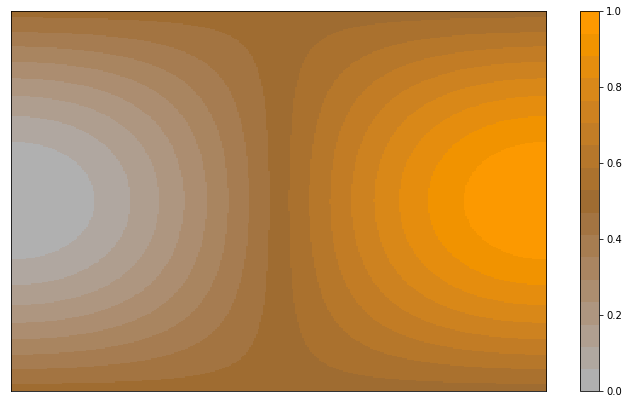

In [4]:
# Let's show the colour map using the test_cmaps function.
plt.figure(figsize=(12, 7))
spx.test_cmap_showme(cmap_error_default,nsteps=17)

Let's look at the galaxy's uncertainty in spectral index data using the default colour map. Here the error/uncertainty maps are also provided in the example_data folder of `CosmosCanvas`.

In [5]:
# Set galaxy information
name='N3079'
title='NGC 3079 error'
errfits_file="example_data/SpecIndexError_N3079.FITS"
RA = [10., 1., 57.8]    # hh.mm.ss
DEC = [55., 40., 47.0] # deg.mm.ss
RADIUS = 0.04 # degrees
shift = [0.0, 0.2/60.] # degrees

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


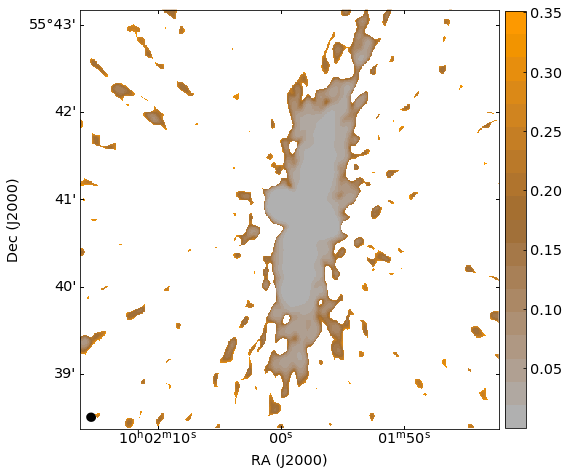

In [6]:
nsteps=18
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,RADIUS,shift,cmap_error_default,nsteps=nsteps)
fig.savefig('plot_galerr_default.png')

For this galaxy, we see the vast majority has very low noise. We choose to shift the mid-chroma point to 25% of the colourmap. We do this using the c_mid parameter. 

In [7]:
name_error='CC-specindex-error-25'
cmap_error, RGB_err_def = spx.create_cmap_specindex_error(c_mid=0.25,modes=['clip'],out=True,name=name_error)
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_err_def['clip'],cmap_error), name=cmap_error)

creating cmap 'CC-specindex-error-25' for Matplotlib (1024 steps)
writing ./cmap_CC-specindex-error-25.png (32x1024)


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


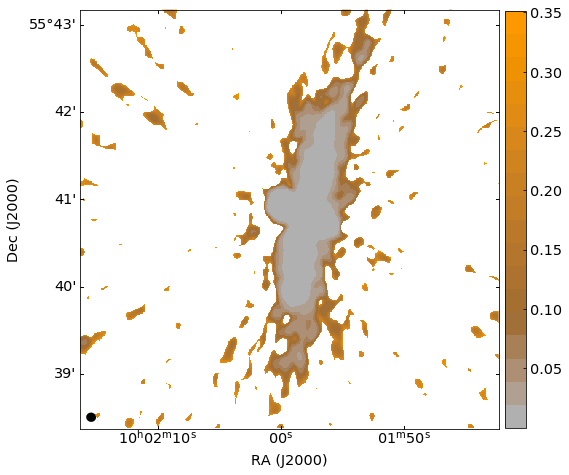

In [8]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,RADIUS,shift,cmap_error,nsteps=nsteps)
fig.savefig('plot_galerr_default.png')

To produce a plot that appears continuous, you can again increase nsteps. 

There are more optional arguements in *create_cmap_specindex_error* in specindex.py. For example one could change the constant colour, create a range of colours, and, in analogy with chroma, shift the fraction of the range that has low luminosity.

In [9]:
# Change the fraction that is luminous by changing L_mid (default = 50) to L_mid=80.
# Note the default L at the top and bottom of the colour map is L_ends=72.
name_error='CC-specindex-error-L80'
cmap_error, RGB_err_def = spx.create_cmap_specindex_error(c_mid=0.25,L_mid=80,modes=['clip'],out=True,name=name_error)
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_err_def['clip'],cmap_error), name=cmap_error)

creating cmap 'CC-specindex-error-L80' for Matplotlib (1024 steps)
writing ./cmap_CC-specindex-error-L80.png (32x1024)


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


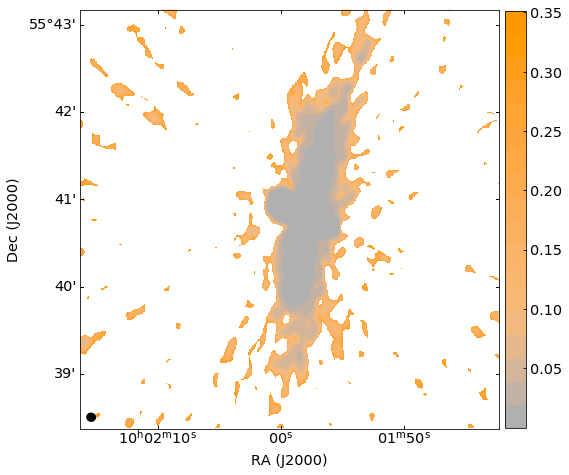

In [10]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,RADIUS,shift,cmap_error,nsteps=nsteps)
fig.savefig('plot_galerr_L80.png')

In [11]:
# Create a number of colours within the high error range.
# The default for the constant orange is H_0=70. and H_min = H_max = none. 
# For a range of colours, H_0 is not used. Instead we set H_max = 70 and  H_min = 250 to cover 
# 180 degrees on the colour wheel. This creates numerous colours and includes the orange's complementary colour.

name_error='CC-specindex-error-hueV1'
cmap_error, RGB_err_def = spx.create_cmap_specindex_error(c_mid=0.25,H_min=250.,H_max=70.,modes=['clip'],out=True,name=name_error)
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_err_def['clip'],cmap_error), name=cmap_error)

creating cmap 'CC-specindex-error-hueV1' for Matplotlib (1024 steps)
writing ./cmap_CC-specindex-error-hueV1.png (32x1024)


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


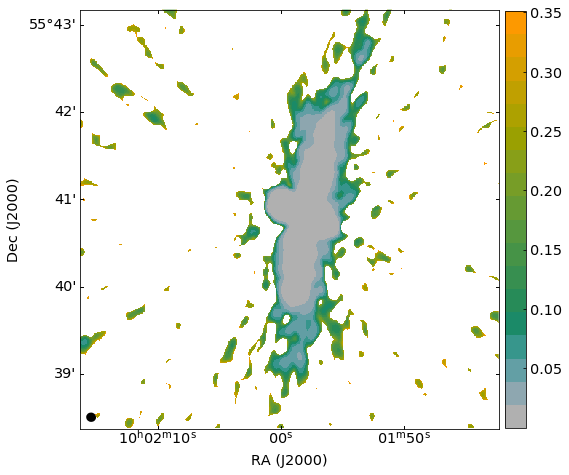

In [12]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,RADIUS,shift,cmap_error,nsteps=nsteps)
fig.savefig('plot_galerr_hueV1.png')

Similarly you can set `H_mid` if you don't want the hue to change in one end or the other. Where we see this being of most use is for the hue to remain constant in the low-uncertainty regime where chroma is low.

In [13]:
# Colour in high error range only: set H_max and H_mid

# Create a number of colours within only the high error range.
# The default for the constant orange is H_0=70. and H_min = H_max = none. 
# For a range of colours, H_0 is not used. Instead here we set H_max = 70 and  H_mid = 250 to cover 
# 180 degrees on the colour wheel. This creates numerous colours and includes the orange's complementary colour.

name_error='CC-specindex-error-hueV1_mid_HighError'
cmap_error, RGB_err_def = spx.create_cmap_specindex_error(c_mid=0.25,H_mid=250.,H_max=70.,modes=['clip'],out=True,name=name_error)
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_err_def['clip'],cmap_error), name=cmap_error)

creating cmap 'CC-specindex-error-hueV1_mid_HighError' for Matplotlib (1024 steps)
writing ./cmap_CC-specindex-error-hueV1_mid_HighError.png (32x1024)


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


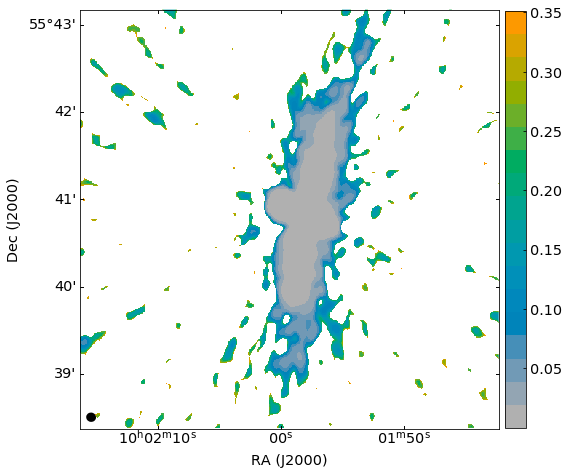

In [14]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,RADIUS,shift,cmap_error,nsteps=nsteps)
fig.savefig('plot_galerr_hueV1_mid_HighError.png')